# Exploratory Data Analysis
---

## Data description

* `ip`: ip address of click.
* `app`: app id for marketing.
* `device`: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
* `os`: os version id of user mobile phone
* `channel`: channel id of mobile ad publisher
* `click_time`: timestamp of click (UTC)
* `attributed_time`: if user download the app for after clicking an ad, this is the time of the app download
* `is_attributed`: the target that is to be predicted, indicating the app was downloaded

Note that ip, app, device, os, and channel are encoded.

The test data is similar, with the following differences:

* `click_id`: reference for making predictions
* `is_attributed: not included

## Import and load data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set a main figure size
fig_size = [0,0]
fig_size[0] = 9
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
pal = sns.color_palette()

data = pd.read_csv("../data/train_sample.csv")
data.head()

ip  app  device  os  channel           click_time attributed_time  \
0   87540   12       1  13      497  2017-11-07 09:30:38             NaN   
1  105560   25       1  17      259  2017-11-07 13:40:27             NaN   
2  101424   12       1  19      212  2017-11-07 18:05:24             NaN   
3   94584   13       1  13      477  2017-11-07 04:58:08             NaN   
4   68413   12       1   1      178  2017-11-09 09:00:09             NaN   

   is_attributed  
0              0  
1              0  
2              0  
3              0  
4              0

## Features exploration

---

### Number of unitque values per feature

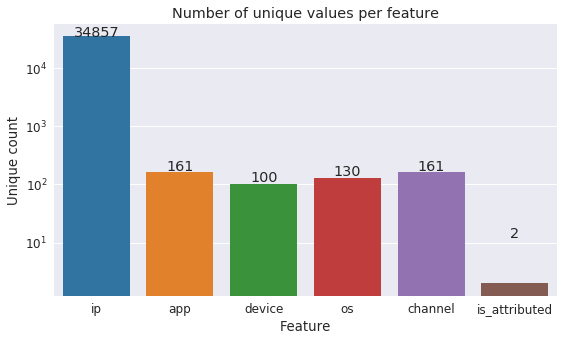

In [3]:
plt.figure(figsize=(9, 5))
cols = ['ip', 'app', 'device', 'os', 'channel', 'is_attributed']
uniques = [len(data[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, palette=pal, log=True)
ax.set(xlabel='Feature', ylabel='Unique count', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

### heatmap to see first correlation

high correlation between os and device (this is logic)
small correlation between app and (os , device) with 0.25 (to deepen)

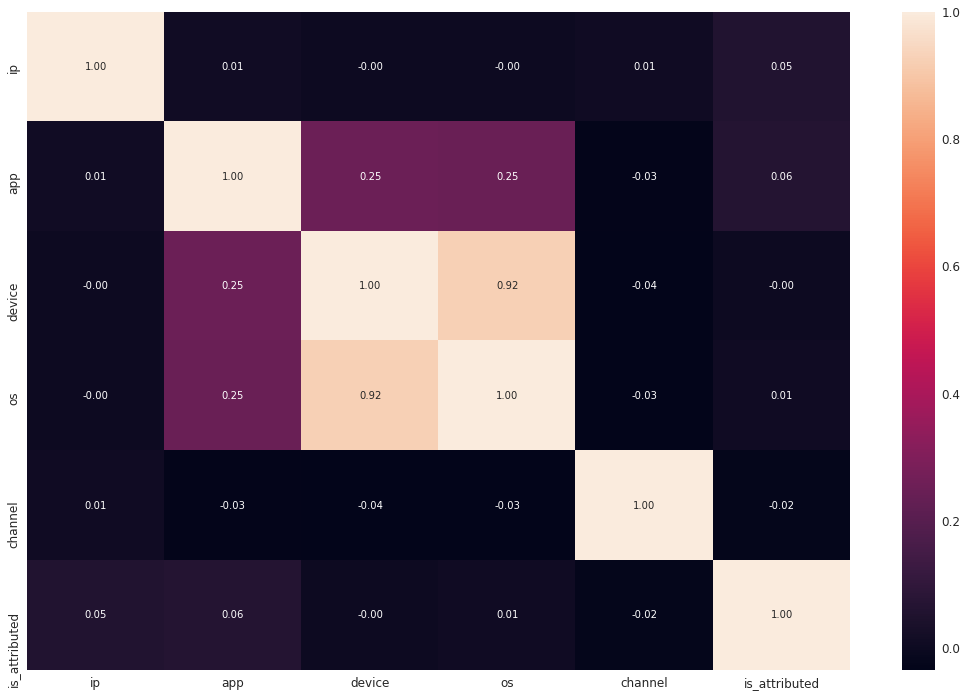

In [4]:
cols = ['ip', 'app', 'device', 'os', 'channel', 'is_attributed']
plt.figure(figsize=(15, 10))
correlation = data[cols].corr()
sns.heatmap(correlation, annot=True, annot_kws={"size": 10}, fmt=".2f")
plt.tight_layout()

In [16]:
data[["app","device","ip","is_attributed"]].groupby(["app","device","is_attributed"]).count()


ip
app device is_attributed       
1   1      0               2959
    2      0                173
    3543   0                  1
    3866   0                  2
2   1      0              11160
    2      0                576
    59     0                  1
3   1      0              17652
           1                  4
    2      0                613
    5      0                  7
    59     0                  3
4   1      0                 51
    2      0                  7
5   1      0                172
           1                 14
    2      0                  2
6   1      0               1256
    2      0                 47
7   1      0                904
    2      0                 74
    3543   0                  1
    3866   0                  2
8   1      0               1822
           1                  4
    2      0                176
    59     0                  2
9   1      0               8341
           1                  7
    2      0                637
...                         ...
232 3032   0                  1
    3543   0                  1
    3866   0                  7
233 3032   0                  1
261 0      1                  1
266 3032   0                  1
    3866   0                  1
267 3543   0                  1
268 3032   0                  1
271 3543   0                  1
273 0      0                  3
293 0      0                  1
302 3543   0                  1
310 0      0                  3
315 1      0                  4
347 3543   0                  1
363 3543   0                  2
372 1      0                  1
394 3032   0                  1
    3543   0                  1
398 1      0                  1
407 3543   0                  1
425 3032   0                  1
    3543   0                  1
474 0      0                  1
486 0      0                  1
536 1      0                  1
538 3032   0                  1
548 3543   0                  1
551 347    0                  1

[410 rows x 1 columns]

In [17]:
data[["app","is_attributed"]].groupby(["is_attributed"]).count()

app
is_attributed       
0              99773
1                227

In [18]:
227/100000

0.00227